In [94]:
# Import
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump
import os
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
#from sklearn.linear_model import LinearRegression

# Light clean

In [95]:
df = pd.read_csv('/Users/antoinebertin/Documents/jedha/project/wine_final.csv')
df.head()

,Unnamed: 0,points,price,province,variety,sweet,acidity,body,tannin,abv,...,wound,wrap,year,yellow,young,youthful,zest,zesty,zin,zinfandel
0,0,87,14.0,Oregon,Pinot Gris,1.56,3.5,2.96,1.0,13.02,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,87,27.0,Alsace,Pinot Gris,1.56,3.5,2.96,1.0,13.02,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,88,18.0,California,Pinot Gris,1.56,3.5,2.96,1.0,13.02,...,0.0,0.311638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,88,18.0,New York,Pinot Gris,1.56,3.5,2.96,1.0,13.02,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,90,112.0,Alsace,Pinot Gris,1.56,3.5,2.96,1.0,13.02,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
df.drop(columns=['Unnamed: 0', 'relevant_words'], inplace=True)

In [100]:
df

,points,price,province,variety,sweet,acidity,body,tannin,abv,accent,...,wound,wrap,year,yellow,young,youthful,zest,zesty,zin,zinfandel
0,87,14.0,Oregon,Pinot Gris,1.56,3.5,2.96,1.00,13.02,0.00000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,87,27.0,Alsace,Pinot Gris,1.56,3.5,2.96,1.00,13.02,0.00000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,88,18.0,California,Pinot Gris,1.56,3.5,2.96,1.00,13.02,0.00000,...,0.0,0.311638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,88,18.0,New York,Pinot Gris,1.56,3.5,2.96,1.00,13.02,0.23716,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,90,112.0,Alsace,Pinot Gris,1.56,3.5,2.96,1.00,13.02,0.00000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64005,85,90.0,Northern Spain,Garnacha,1.17,3.0,3.29,2.83,13.46,0.00000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64006,85,18.0,Northern Spain,Garnacha,1.17,3.0,3.29,2.83,13.46,0.00000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64007,91,20.0,Washington,Garnacha,1.17,3.0,3.29,2.83,13.46,0.00000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64008,85,10.0,Northern Spain,Garnacha,1.17,3.0,3.29,2.83,13.46,0.00000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Define and Split X & y

In [101]:
X = df.drop(["price"], axis=1)
y = df["price"]

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

# Feature encoder

In [104]:
X_train.head()

,points,province,variety,sweet,acidity,body,tannin,abv,accent,accessible,...,wound,wrap,year,yellow,young,youthful,zest,zesty,zin,zinfandel
61566,85,Northern Spain,Tempranillo,1.14,3.07,3.66,3.17,13.27,0.0,0.0,...,0.0,0.0,0.0,0.0,0.321605,0.0,0.000000,0.0,0.0,0.0
58047,86,Northern Spain,Verdejo,1.26,3.21,2.85,1.03,12.93,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
36799,87,California,Riesling,2.27,3.92,2.83,1.00,10.84,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.229544,0.0,0.0,0.0
48076,87,New York,Cabernet Franc,1.11,3.34,3.73,3.19,13.57,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
7027,86,California,Pinot Noir,1.03,4.00,3.03,2.37,13.28,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


In [107]:
# for i, j in enumerate(X_train.columns):
#     if j not in ['province', "variety"]:
#         print(i)        

In [108]:
#Numeric features and transformer
numeric_features = [i for i,j in enumerate(X_train.columns) if j not in ['province', "variety"]]
numeric_transformer = StandardScaler()

#Categorical features and transformers
categorical_features = [1, 2]

categorical_transformer = OneHotEncoder(drop='first')

#ColumnTransformer with mixed types
feature_encoder = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [109]:
X_train = feature_encoder.fit_transform(X_train)
X_test = feature_encoder.transform(X_test)

In [89]:
rfc = RandomForestRegressor(max_depth=10)
#rfc = LinearRegression()
rfc.fit(X_train, y_train)

RandomForestRegressor(max_depth=10)

# Model perf

In [110]:
rfc.score(X_train, y_train), rfc.score(X_test, y_test)

(0.7147105105511292, 0.3702130627762934)

In [111]:
y_test_pred = rfc.predict(X_test)

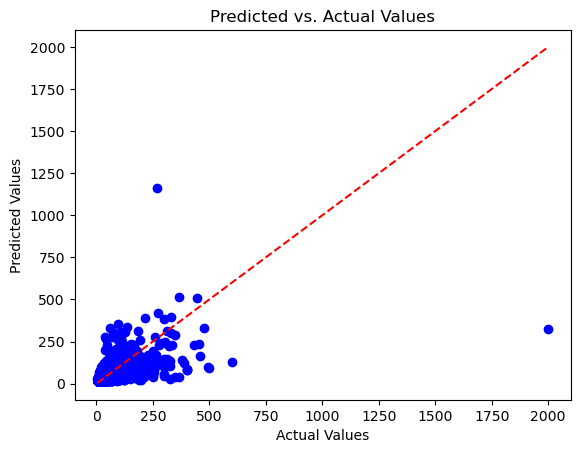

In [112]:
# Assuming you have your actual values 'y_test' and predicted values 'y_pred'
plt.scatter(y_test, y_test_pred, color='blue')
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Plotting a diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.show()

# features importance

In [175]:
importances = rfc.feature_importances_
province_coef_mean = np.mean(importances[:len(feature_encoder.transformers_[1][1].categories_[0])])
variety_coef_mean = np.mean(importances[len(feature_encoder.transformers_[1][1].categories_[0]):-1])
# Number of categories for 'province' and 'variety'
num_province_categories = len(feature_encoder.transformers_[1][1].categories_[0])
num_variety_categories = len(feature_encoder.transformers_[1][1].categories_[1])

# The starting index for numeric features in feature_importances_
start_index_numeric = num_province_categories + num_variety_categories

# Number of TF-IDF description columns
num_description_cols = 578

# Coefficients for numeric features (excluding 'price')
points_coef = importances[start_index_numeric]
sweet_coef = importances[start_index_numeric + 1]
acidity_coef = importances[start_index_numeric + 2]
body_coef = importances[start_index_numeric + 3]
tannin_coef = importances[start_index_numeric + 4]
abv_coef = importances[start_index_numeric + 5]

# Calculate mean importance for description features
# Assuming description features come right after the other numeric features
start_index_description = start_index_numeric + 6  # Adjusting start index for description features
description_coef_mean = np.mean(importances[start_index_description:start_index_description + num_description_cols])

# Constructing the DataFrame
simplified_feature_importance = pd.DataFrame({
    "feature_names": ["province", "variety", "points", "sweet", "acidity", "body", "tannin", "abv", "description"],
    "aggregated_coefficients": [
        province_coef_mean, variety_coef_mean, points_coef, sweet_coef,
        acidity_coef, body_coef, tannin_coef, abv_coef, description_coef_mean
    ]
})

# Sorting the DataFrame
sorted_feature_importance = simplified_feature_importance.sort_values(by="aggregated_coefficients", ascending=False)
sorted_feature_importance

,feature_names,aggregated_coefficients
0,province,0.008740
8,description,0.000843
2,points,0.000839
1,variety,0.000816
5,body,0.000558
6,tannin,0.000162
7,abv,0.000119
3,sweet,0.000097
4,acidity,0.000030


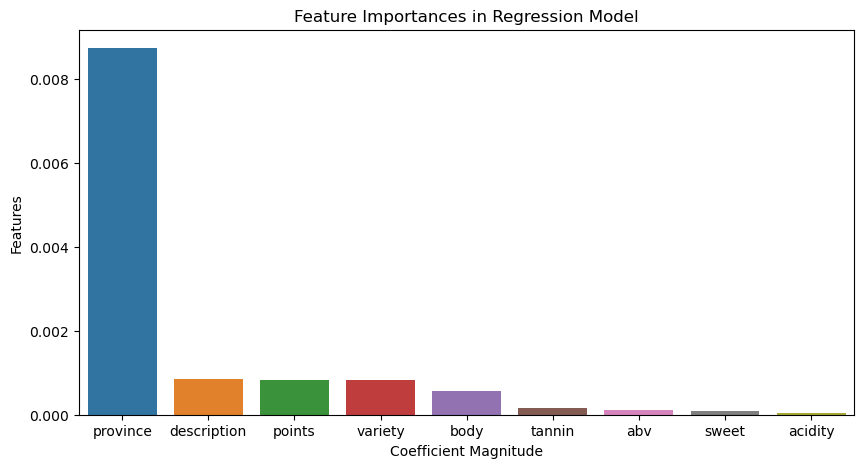

In [176]:
# Assuming feature_importance is your DataFrame from the previous step
plt.figure(figsize=(10, 5))  # Adjust the size as needed

# Sort the DataFrame by coefficients to see the most important features
feature_importance_sorted = simplified_feature_importance.sort_values(by='aggregated_coefficients', ascending=False)

# Create a barplot
sns.barplot(x='feature_names', y='aggregated_coefficients', data=feature_importance_sorted)

# Highlight the 'points' feature
#plt.axhline(y=feature_importance_sorted.index[feature_importance_sorted['feature_names'] == 'points'][0], color='red', linestyle='--')

plt.title('Feature Importances in Regression Model')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.show()

# TEST

In [114]:
df.head()

,points,price,province,variety,sweet,acidity,body,tannin,abv,accent,...,wound,wrap,year,yellow,young,youthful,zest,zesty,zin,zinfandel
0,87,14.0,Oregon,Pinot Gris,1.56,3.5,2.96,1.0,13.02,0.00000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,87,27.0,Alsace,Pinot Gris,1.56,3.5,2.96,1.0,13.02,0.00000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,88,18.0,California,Pinot Gris,1.56,3.5,2.96,1.0,13.02,0.00000,...,0.0,0.311638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,88,18.0,New York,Pinot Gris,1.56,3.5,2.96,1.0,13.02,0.23716,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,90,112.0,Alsace,Pinot Gris,1.56,3.5,2.96,1.0,13.02,0.00000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
new_prediction = {
    'points': [87],
    'province': ['Douro'],
    'variety': ['Gewürztraminer']
}

df_new_prediction = pd.DataFrame(new_prediction)
new_prediction = feature_encoder.transform(df_new_prediction)

# Make predictions on the new data
the_prediction = rfc.predict(new_prediction)
print(f"The prediction is: {the_prediction}")

KeyError: "['sweet', 'acidity', 'body', 'tannin', 'abv'] not in index"